In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

Part 1: Prepare the Data

In [3]:
# Read myopia.csv into a Pandas DataFrame.
file_path = Path('Resources/myopia.csv')
df = pd.read_csv(file_path)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [4]:
# Remove the "MYOPIC" column from the dataset.
X = df.drop('MYOPIC',axis=1)
X

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [5]:
# Standardize the data
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


Part 2: Apply Dimensionality Reduction

In [6]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Use PCA to compress data
X_pca = pca.fit_transform(X_scaled)

# Print the number of features in the original and reduced datasets
print('Number of features in original dataset:', X.shape[1])
print('Number of features in reduced dataset:', X_pca.shape[1])

Number of features in original dataset: 14
Number of features in reduced dataset: 10


In [7]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=100)

# Reduce dimensions 
tsne_features = tsne.fit_transform(X_pca)

# Print the number of features
print('Number of features in reduced dataset:',tsne_features.shape[1])

Number of features in reduced dataset: 2


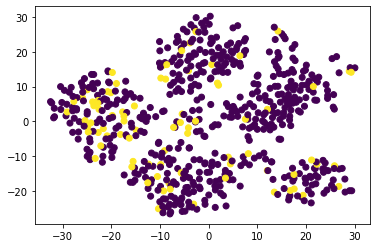

In [8]:
# Prepare to plot the dataset

# Create a new DataFrame with the transformed features
X_transformed = pd.DataFrame(tsne_features, columns=['x', 'y'])

# Assign class labels to data points
X_transformed['class'] = df['MYOPIC']

# Visualize the clusters with color
plt.scatter(X_transformed['x'], X_transformed['y'], c=X_transformed['class'])
plt.show()


Part 3: Perform a Cluster Analysis with K-means

In [9]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_transformed)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,270752.956398
1,2,160576.266979
2,3,93781.058860
3,4,66038.077606
4,5,43047.579033


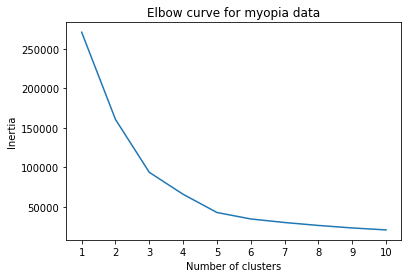

In [10]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

In [11]:
# Create a KneeLocator object to find the elbow point in the plot
kl = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')

# Use the elbow attribute of the KneeLocator object to find the index of the elbow point, which corresponds to the best k value
best_k = kl.elbow

# Print the best k value
print('The best k value is:', best_k)

The best k value is: 3


In [12]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create new DataFrame with t-SNE features and predicted clusters
    clustered_data = data.copy()
    clustered_data['cluster'] = predictions

    return clustered_data

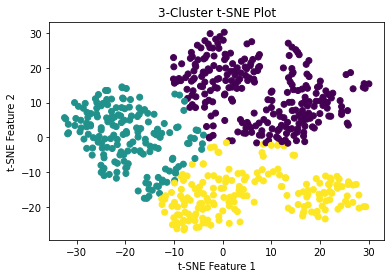

In [13]:
# Add t-SNE features and class labels to a new DataFrame
cluster_data = pd.DataFrame({'x': tsne_features[:,0], 'y': tsne_features[:,1], 'class': df['MYOPIC']})

# Perform clustering with k=3
k = 3
clustered_data = get_clusters(k, cluster_data)

# Create a scatter plot of the clustered data
plt.scatter(clustered_data['x'], clustered_data['y'], c=clustered_data['cluster'])
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title(f'{k}-Cluster t-SNE Plot')
plt.show()